# VMware EXSi Visualisations 0

In [1]:
import requests
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from IPython.core.display import HTML
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:60% !important; }</style>"))

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

We get the json file with the information from: https://wmwaredata.s3.us-east-2.amazonaws.com/machines.json

In [3]:
url = 'https://wmwaredata.s3.us-east-2.amazonaws.com/machines.json'
r = requests.get(url, allow_redirects=True)
open('data/machines.json', 'wb').write(r.content)

17777

In [4]:
json_file = 'data/machines.json' 
df = pd.read_json(json_file)
df

,BootTime,CommitedSpace,ConnectionState,CreateDate,Folder,Guest,GuestId,HardwareVersion,IPAddress,Id,...,MaxMemoryUsage,MemoryMB,Name,Notes,NumCpu,NumVirtualDisks,PowerState,UNCommitedSpace,Uid,VMHost
0,None,52428811623,connected,2020-12-17 12:41:18.983967+00:00,[datastore1] minio-server/minio-server.vmx,minio-server,ubuntu64Guest,NaN,None,564dc967-cabc-a924-e845-ef688f454b58,...,2048,2048,minio-server,dontdeleteme,2,1,poweredOff,52428811623,,'vim.HostSystem:ha-host'
1,None,107374191084,connected,2020-12-23 13:16:39.483139+00:00,[datastore1] file-gateway/file-gateway.vmx,file-gateway,otherGuest64,NaN,None,564d88b0-0262-97fe-1653-d0d954ea5eca,...,4096,4096,file-gateway,deleteme,2,2,poweredOff,107374191084,52e74898-905f-0eff-2214-1743724008fb,'vim.HostSystem:ha-host'
2,None,13627302380,connected,2020-12-16 19:15:08.062780+00:00,[datastore1] proxy-rebuild/proxy-rebuild.vmx,proxy-rebuild,ubuntu64Guest,NaN,None,564d25c0-63c0-b060-c919-9cf9cb3f3b0b,...,8192,8192,proxy-rebuild,dontdeleteme\ncreated by: Pranay\nTHis a demo,2,1,poweredOff,13627302380,52cea534-f65c-1a19-a36e-37c56de42775,'vim.HostSystem:ha-host'
3,None,21784415336,connected,2020-12-24 17:02:39.302922+00:00,[datastore1] _icap_servers/GOV-UK-01/GOV-UK/GO...,GOV-UK,ubuntu64Guest,NaN,None,564d1d5a-b278-9a61-ace5-630adc93a02f,...,2048,2048,GOV-UK,dontdeleteme,2,1,poweredOff,21784415336,52eeaec4-a096-ba3e-0915-2d6c499cf38c,'vim.HostSystem:ha-host'
4,2021-01-13 08:06:47.079466+00:00,14866722136,connected,2021-01-13 08:06:47.096404+00:00,[datastore1] desktop/desktop.vmx,desktop,ubuntu64Guest,NaN,fe80::d651:b27e:aee4:f6fd,564dd423-d9fe-f9d3-22e2-a2bc8dc2cf92,...,4096,4096,desktop,dont_delete,2,1,poweredOn,14866722136,,'vim.HostSystem:ha-host'
5,None,8589943276,connected,2020-12-23 13:18:52.344821+00:00,[datastore1] Packer-export-i-0259c38b36cbaabc2...,Packer-export-i-0259c38b36cbaabc2.ova,ubuntu64Guest,NaN,None,564d6350-f354-47de-ac94-d204043ee63b,...,2048,2048,Packer-export-i-0259c38b36cbaabc2.ova,dont_delete,1,1,poweredOff,8589943276,52bf4027-16d6-bb65-36c5-9cded1ac2a77,'vim.HostSystem:ha-host'
6,None,8589934592,connected,2020-12-17 16:41:05.705491+00:00,[datastore1] Packer-export-i-07cb42cec69a8d5fa...,Packer-export-i-07cb42cec69a8d5fa.ova,ubuntu64Guest,NaN,None,564dd1d4-2bb0-c458-291d-c5f10b17b0bb,...,2048,2048,Packer-export-i-07cb42cec69a8d5fa.ova,dont_delete,1,1,poweredOff,8589934592,52d7b5b7-495b-20c1-692e-10f81bf38103,'vim.HostSystem:ha-host'
7,None,8589934592,connected,2020-12-17 17:42:11.749106+00:00,[datastore1] Packer-export-i-04364bb983092f191...,Packer-export-i-04364bb983092f191.ova,ubuntu64Guest,NaN,None,564db9f2-07d0-5cf4-7ccf-c9393381f209,...,2048,2048,Packer-export-i-04364bb983092f191.ova,dont_delete,1,1,poweredOff,8589934592,52611fd7-6a9e-c013-ba8a-a0e721b91410,'vim.HostSystem:ha-host'
8,None,44079805602,connected,2020-12-21 12:51:46.780857+00:00,[datastore1] icap-perf-load-generator-v0.6/ica...,icap-perf-load-generator-v0.6,ubuntu64Guest,NaN,None,564d1d16-f350-d678-a4a3-20f683c71981,...,8192,8192,icap-perf-load-generator-v0.6,dont_delete,12,1,poweredOff,44079805602,529240fd-41e4-1fa9-a601-9647ca9258a6,'vim.HostSystem:ha-host'
9,None,13627302380,connected,2020-12-23 13:20:59.334072+00:00,[datastore1] proxy-rebuild-01/proxy-rebuild-01...,proxy-rebuild-01,ubuntu64Guest,NaN,None,564de02d-0b45-d9d9-aa99-85ce0ff747ff,...,8192,8192,proxy-rebuild-01,dont_delete\ncreated by: Pranay,2,1,poweredOff,13627302380,5293b6f4-f2fc-bf6c-a5eb-7d5c9fe52f80,'vim.HostSystem:ha-host'


## Power State

In [5]:
df.PowerState.value_counts()

poweredOff    14
poweredOn      7
Name: PowerState, dtype: int64

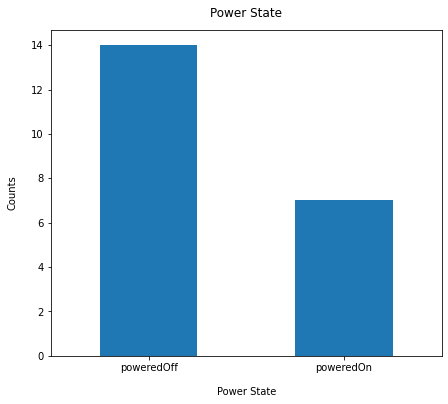

In [6]:
df.PowerState.value_counts().plot(kind='bar', figsize=(7, 6), rot=0) #kind='barh'
plt.xlabel("Power State", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Power State", y=1.02);

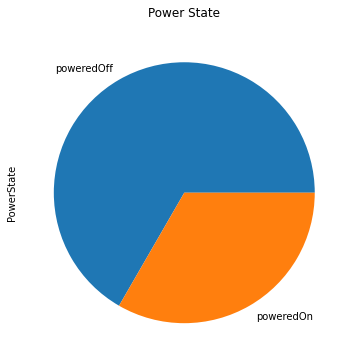

In [7]:
df.PowerState.value_counts().plot(kind='pie', figsize=(7, 6), rot=0) 
plt.title("Power State", y=1.02);

## Number of CPUs

In [8]:
df.NumCpu.value_counts()

2     11
1      8
12     1
4      1
Name: NumCpu, dtype: int64

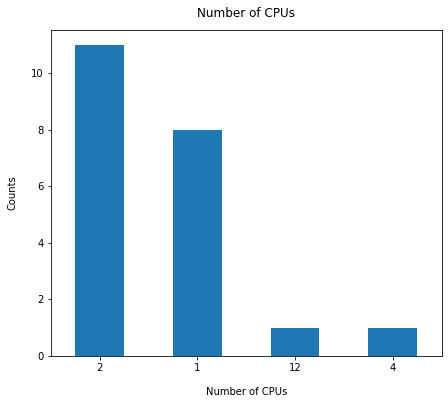

In [9]:
df.NumCpu.value_counts().plot(kind='bar', figsize=(7, 6), rot=0) #kind='barh'
plt.xlabel("Number of CPUs", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Number of CPUs", y=1.02);

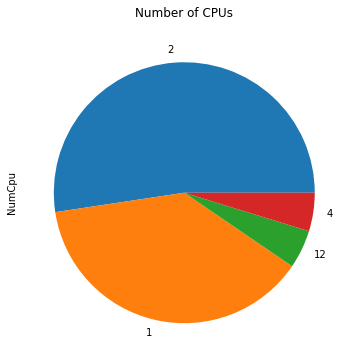

In [10]:
df.NumCpu.value_counts().plot(kind='pie', figsize=(7, 6), rot=0) 
plt.title("Number of CPUs", y=1.02);

## Memory

In [11]:
df.MemoryMB.value_counts()

2048     11
8192      4
4096      3
16384     1
1024      1
512       1
Name: MemoryMB, dtype: int64

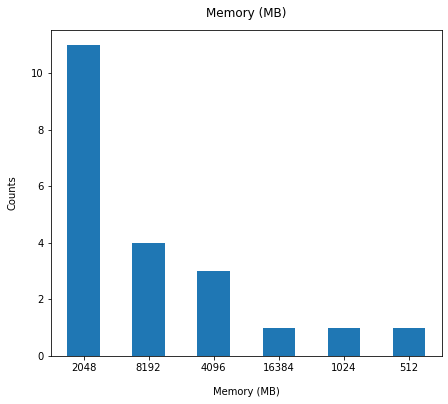

In [12]:
df.MemoryMB.value_counts().plot(kind='bar', figsize=(7, 6), rot=0) #kind='barh'
plt.xlabel("Memory (MB)", labelpad=14)
plt.ylabel("Counts", labelpad=14)
plt.title("Memory (MB)", y=1.02);

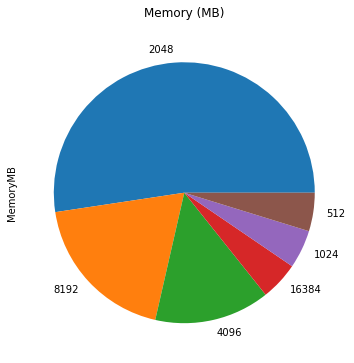

In [13]:
df.MemoryMB.value_counts().plot(kind='pie', figsize=(7, 6), rot=0) 
plt.title("Memory (MB)", y=1.02);

[comment]: <> (## Provisioned Space)

In [14]:
#xint = [x for x in range(len(df))]
#y = np.asarray(df.ProvisionedSpaceGB)
#plt.figure(figsize=(10, 6))
#plt.plot(y, 'o-', color='black')
#plt.xticks(xint)
#plt.xlabel("VM", labelpad=14)
#plt.ylabel("Provisioned Space (GB)", labelpad=14)
#plt.title("Provisioned Space (GB)", y=1.02);

[comment]: <> (## Used Space)

In [15]:
#y = np.asarray(df.UsedSpaceGB)
#plt.figure(figsize=(10, 6))
#plt.plot(y, 'o-', color='black')
#plt.xticks(xint)
#plt.xlabel("VM", labelpad=14)
#plt.ylabel("Used Space (GB)", labelpad=14)
#plt.title("Used Space (GB)", y=1.02);